In [2]:
# Reading the CSV data

import csv
rows = []
newRows = []
with open('covid_randomrowsa.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    header = next(csvreader)
    sexOtherIndex = header.index('sex_other')
    employmentOtherIndex = header.index('employ_status_other')

    for row in csvreader:
        newRow = [row[i] for i in range(0,len(row)) if i != sexOtherIndex and i!= employmentOtherIndex]
        newRows.append(newRow)
        rows.append(row)
print(header)
print(len(rows))

['', 'RecordDate', 'Duration_sec', 'Country', 'Language', 'X.NA', 'X.NA.1', 'physical_contact__1', 'physical_contact__2', 'physical_contact__3', 'physical_contact__4', 'physical_contact__5', 'physical_hygiene__1', 'physical_hygiene__2', 'physical_hygiene__3', 'physical_hygiene__4', 'physical_hygiene__5', 'policy_support__1', 'policy_support__2', 'policy_support__3', 'policy_support__4', 'policy_support__5', 'generosity__1', 'generosity__2', 'generosity__3', 'SUM_GEN', 'psych_wellbeing1', 'psych_wellbeing2', 'collective_narcis__1', 'collective_narcis__2', 'collective_narcis__3', 'national_identity__1', 'national_identity__2', 'Conspiracy_theories__1', 'Conspiracy_theories__2', 'Conspiracy_theories__3', 'Conspiracy_theories__4', 'open_mindedness__1', 'open_mindedness__2', 'open_mindedness__3', 'open_mindedness__4', 'open_mindedness__5', 'open_mindedness__6', 'morality_as_cooperat_1', 'morality_as_cooperat_2', 'morality_as_cooperat_3', 'morality_as_cooperat_4', 'morality_as_cooperat_5', '

[2168, 2415, 13]


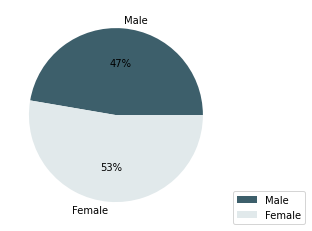

In [11]:
# Baseline characteristics no.1 - Gender Distribution
import matplotlib.pyplot as plt

genderIndex = header.index('sex')
genderList = []
for row in rows:
  genderList.append(row[genderIndex])

genderDistribution = [0,0,0]
for gender in genderList:
  if gender == '1':
    genderDistribution[0] += 1
  elif gender == '2':
    genderDistribution[1] += 1
  elif gender == '3':
    genderDistribution[2] += 1

print(genderDistribution)
mylabels = ["Male", "Female"]
mycolors = ['#3d5f6b', '#e1e9eb']
plt.pie(genderDistribution[:2], labels = mylabels, autopct='%1.0f%%', colors=mycolors)
plt.legend(loc=(1.04, 0))
plt.show() 

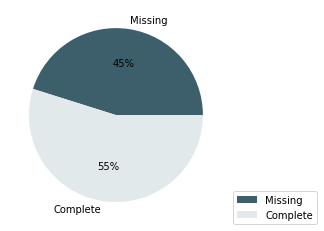

Notice: Here we define a tuple is 'missing' if there is at least 1 cell in the tuple to be None.


In [4]:
# Baseline characteristic no.2 - Missing data percentage

missing = 0
total = 0
for row in newRows:
  total += 1
  for cell in row:
    if(cell is None or cell == 'NA'):
      missing += 1
      break
missingList = [missing, total - missing]
mylabels = ["Missing", "Complete"]
mycolors = ['#3d5f6b', '#e1e9eb']
plt.pie(missingList, labels = mylabels, autopct='%1.0f%%', colors=mycolors)
plt.legend(loc=(1.04, 0))
plt.show() 

print("Notice: Here we define a tuple is 'missing' if there is at least 1 cell in the tuple to be None.")

[49, 39, 28, 73, 73, 44, 31, 27, 40, 20, 27, 24, 27, 66, 42, 55, 38, 31, 29, 35, 36, 66, 36, 29, 33, 29, 42, 63, 37, 48, 25, 24, 32, 23, 44, 27, 54, 49, 72, 34, 65, 22, 29, 39, 30, 65, 33, 57, 35, 54, 41, 49, 32, 37, 82, 55, 55, 56, 48, 39, 36, 65, 53, 28, 32, 24, 30, 71, 21, 51, 25, 18, 18, 33, 59, 22, 38, 32, 59, 32, 18, 33, 22, 37, 37, 52, 41, 33, 37, 61, 38, 29, 45, 40, 35, 21, 50, 25, 69, 53, 49, 32, 40, 29, 47, 30, 64, 27, 61, 42, 48, 67, 50, 55, 53, 72, 42, 33, 47, 56, 33, 30, 37, 36, 38, 74, 21, 29, 37, 53, 42, 40, 23, 36, 18, 72, 51, 48, 29, 45, 26, 51, 40, 55, 40, 25, 45, 47, 25, 66, 44, 26, 22, 72, 52, 21, 27, 46, 35, 35, 68, 73, 42, 48, 48, 44, 72, 31, 36, 25, 39, 70, 33, 53, 30, 72, 40, 49, 51, 54, 20, 52, 34, 30, 54, 20, 57, 40, 60, 29, 67, 60, 50, 53, 24, 69, 61, 47, 56, 46, 35, 20, 67, 24, 35, 46, 56, 61, 75, 24, 32, 67, 21, 23, 63, 18, 22, 50, 45, 25, 68, 62, 20, 35, 70, 21, 28, 63, 40, 73, 33, 62, 34, 32, 29, 31, 59, 56, 33, 49, 36, 34, 41, 20, 39, 21, 45, 65, 62, 57,

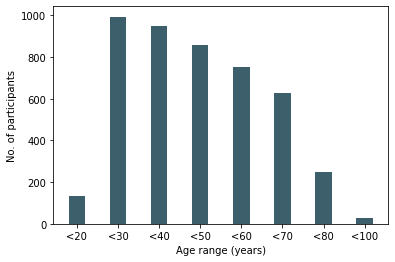

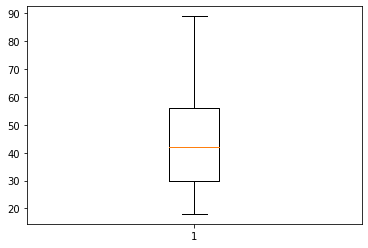

89


In [12]:
# Baseline characteristic no.3 - Age distribution
ageList = []
ageIndex = header.index('age')
for row in rows:
  if row[ageIndex] is not None and row[ageIndex] != 'NA':
    ageList.append(int(row[ageIndex]))

print(ageList)
# index  age range 
#  0       < 20
#  1       < 30
#  2       < 40
#  3       < 50
#  4       < 60
#  5       < 70
#  6       < 80
#  7       else

ageDistribution = [0,0,0,0,0,0,0,0]
for age in ageList:
  if age < 20:
    ageDistribution[0] += 1
  elif age < 30:
    ageDistribution[1] += 1
  elif age < 40:
    ageDistribution[2] += 1
  elif age < 50:
    ageDistribution[3] += 1
  elif age < 60:
    ageDistribution[4] += 1
  elif age < 70:
    ageDistribution[5] += 1
  elif age < 80:
    ageDistribution[6] += 1
  else:
    ageDistribution[7] += 1
ageRange = ['<20', '<30', '<40', '<50', '<60', '<70', '<80', '<100']
plt.bar(ageRange, ageDistribution, color ='#3d5f6b',width = 0.4)
plt.xlabel("Age range (years)")
plt.ylabel("No. of participants")
plt.show()

# box plot of age
plt.boxplot(ageList)
plt.xlabel("")
plt.show()
print(max(ageList))

In [14]:
pip install pycountry-convert


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.1 MB 27.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 209 kB 46.1 MB/s 
     |████████████████████████████████| 298 kB 42.4 MB/s 
     |████████████████████████████████| 297 kB 53.5 MB/s 
     |████████████████████████████████| 297 kB 53.7 MB/s 
     |████████████████████████████████| 297 kB 61.2 MB/s 
     |████████████████████████████████| 296 kB 65.7 MB/s 
     |████████████████████████████████| 296 kB 64.4 MB/s 
     |████████████████████████████████| 280 kB 57.6 MB/s 
     |████████████████████████████████| 280 kB 58.2 MB/s 
     |████████████████████████████████| 280 kB 59.8 MB/s 
     |████████████████████████████████| 280 kB 59.5 MB/s 
     |████████████████████████████████| 279 kB 55.6 MB/s 
     |██████████████

['GERMANY', 'SLOVAKIA', 'AUSTRIA', 'POLAND', 'JAPAN', 'JAPAN', 'HUNGARY', 'BRAZIL', 'ISRAEL', 'BRAZIL', 'IRELAND', 'COLOMBIA', 'FRANCE', 'HUNGARY', 'GERMANY', 'GREECE', 'GERMANY', 'SERBIA', 'SOUTH AFRICA', 'NEW ZEALAND', 'ISRAEL', 'CROATIA', 'SLOVAKIA', 'POLAND', 'CHINA', 'AUSTRIA', 'ISRAEL', 'SWISS', 'AUSTRIA', 'INDIA', 'FRANCE', 'GREECE', 'JAPAN', 'BULGARY', 'ITALY', 'SOUTH KOREA', 'USA', 'NIGERIA', 'FINLAND', 'AUSTRALIA', 'NEW ZEALAND', 'MOROCCO', 'SLOVAKIA', 'USA', 'MEXICO', 'IRELAND', 'SLOVAKIA', 'JAPAN', 'INDIA', 'SINGAPORE', 'POLAND', 'COLOMBIA', 'JAPAN', 'HUNGARY', 'POLAND', 'BRAZIL', 'CROATIA', 'RUSSIA', 'CHINA', 'ISRAEL', 'GERMANY', 'SWISS', 'SLOVAKIA', 'GERMANY', 'BRAZIL', 'BRAZIL', 'POLAND', 'AUSTRIA', 'AUSTRALIA', 'ROMANIA', 'BRAZIL', 'UKRAINE', 'VENEZUELA', 'POLAND', 'POLAND', 'BULGARY', 'SERBIA', 'NEW ZEALAND', 'ITALY', 'SENEGAL', 'POLAND', 'GERMANY', 'KURDISTAN', 'USA', 'ITALY', 'FRANCE', 'AUSTRALIA', 'BANGLADESH', 'GREECE', 'BRAZIL', 'DENMARK', 'AUSTRIA', 'UKRAINE', 'A

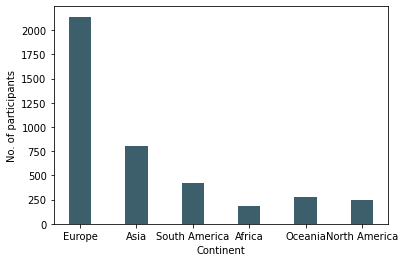

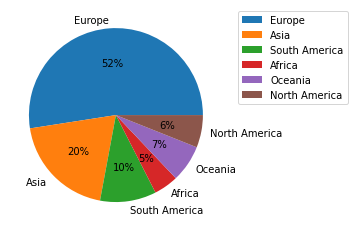

In [15]:
# Baseline characteristic no.4 - Geographical Distribution of participants
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2, convert_continent_code_to_continent_name
from collections import Counter

countryList = []
countryIndex = header.index('Country')
for row in rows:
  if row[countryIndex] is not None and row[countryIndex] != 'NA':
    countryList.append(row[countryIndex])
print(countryList)

# function to get continent name from a country name
def getContinent(countryName):
  # we only keep the one with valid country name
  try:
    countryCode = country_name_to_country_alpha2(countryName.title())
    continentCode = country_alpha2_to_continent_code(countryCode)
    continentName = convert_continent_code_to_continent_name(continentCode)
    return continentName
  except:
    pass

continentList = []
for country in countryList:
  if getContinent(country) is not None:
    continentList.append(getContinent(country))
print(continentList)

# bar graph
counter = Counter(continentList)
continentNames = counter.keys()
continentNums = counter.values()
plt.bar(continentNames, continentNums, color ='#3d5f6b',width = 0.4)
plt.xlabel("Continent")
plt.ylabel("No. of participants")
plt.show()

# pie chart
plt.pie(counter.values(), labels = counter.keys(), autopct='%1.0f%%',)
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()


[1567, 867, 2136]


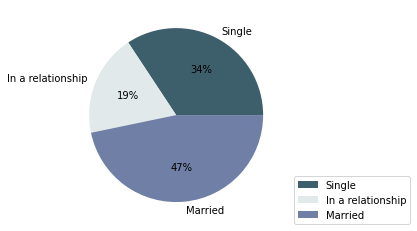

In [ ]:
# Baseline characteristic no.5 - marital status
maritalIndex = header.index('marit_status')
maritalList = []
for row in rows:
  maritalList.append(row[maritalIndex])

maritalDistribution = [0,0,0]
for status in maritalList:
  if status == '1':
    maritalDistribution[0] += 1
  elif status == '2':
    maritalDistribution[1] += 1
  elif status == '3':
    maritalDistribution[2] += 1

print(maritalDistribution)
mylabels = ["Single", "In a relationship", "Married"]
mycolors = ['#3d5f6b', '#e1e9eb', '#6f7fa5']
plt.pie(maritalDistribution, labels = mylabels, autopct='%1.0f%%', colors=mycolors)
plt.legend(loc=(1.04, 0))
plt.show() 